Factor Investement
----------------------------------------

In [12]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import RiskParityOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import FixedEvacuator
from mypo import Runner

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    loader = Loader()
    loader.get('VT', 0.08 * 10e-3)
    loader.get('BNDW', 0.08 * 10e-3)
    
    loader.get('SPY', 0.09 * 10e-3)
    loader.get('IEF', 0.15 * 10e-3)
    loader.get('TLT', 0.15 * 10e-3)
    
    loader.get('VWO', 0.1 * 10e-3)
    loader.get('IVV', 0.03 * 10e-3)
    loader.get('SPDW', 0.04 * 10e-3)
    loader.get('BND', 0.04 * 10e-3)
    loader.get('BNDX', 0.08 * 10e-3)
    loader.get('GLD', 0.4 * 10e-3)
    loader.save('/app/docs/tutorial/portfolio.bin')

loader = Loader.load('/app/docs/tutorial/portfolio.bin')
clutter_market = loader.filter(['VWO', 'IVV', 'SPDW', 'BND', 'BNDX', 'GLD']).get_market()
weighted_market = loader.filter(['VT', 'BND', 'BNDX', 'GLD']).get_market()
us_market = loader.filter(['SPY', 'IEF', 'TLT', 'GLD']).get_market()

World Risk Weighted 
------------------------

100%|██████████| 1854/1854 [00:24<00:00, 76.72it/s]


                            tickers  yearly total return  sharpe ratio  \
0  [VWO, IVV, SPDW, BND, BNDX, GLD]             1.054614      0.473587   

   max draw down  max draw down span  
0       0.835713                 343  


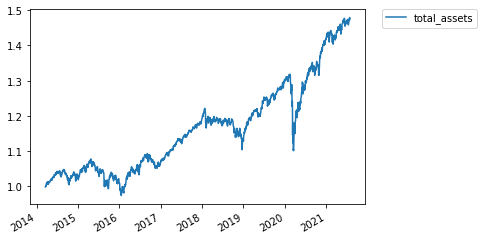

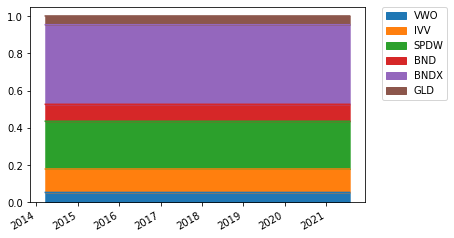

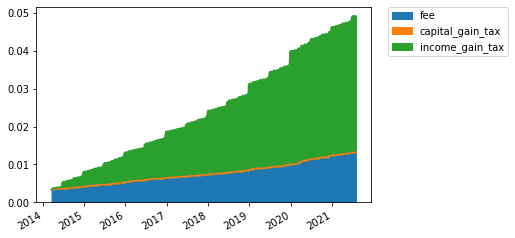

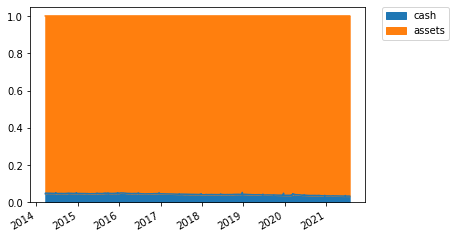

In [13]:
folds = split_k_folds(clutter_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer(risk_target=[0.85 * 0.175, 0.85 * 0.223, 0.85 * 0.603, 0.10 *0.25 , 0.10 * 0.75,  0.05])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


World Value Weighted 
------------------------

100%|██████████| 1854/1854 [00:20<00:00, 89.42it/s]


                tickers  yearly total return  sharpe ratio  max draw down  \
0  [VT, BND, BNDX, GLD]              1.06164      0.556957       0.832026   

   max draw down span  
0                 301  


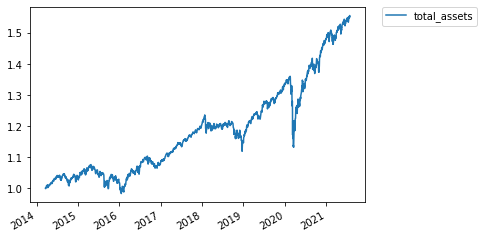

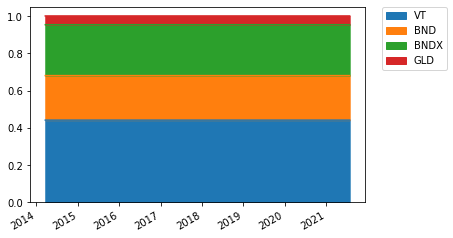

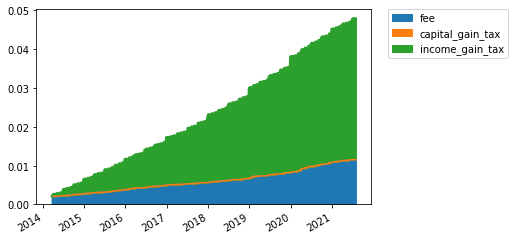

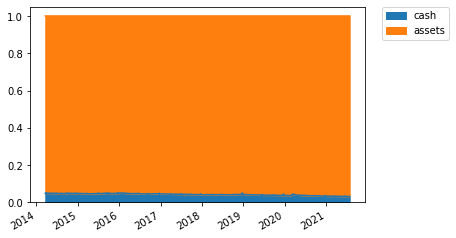

In [14]:
folds = split_k_folds(weighted_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer(risk_target=[0.85, 0.0512, 0.0488, 0.05])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


US Value Weighted 
------------------------

100%|██████████| 4002/4002 [00:47<00:00, 83.60it/s]


                tickers  yearly total return  sharpe ratio  max draw down  \
0  [SPY, IEF, TLT, GLD]             1.085318      0.610989       0.690173   

   max draw down span  
0                 725  


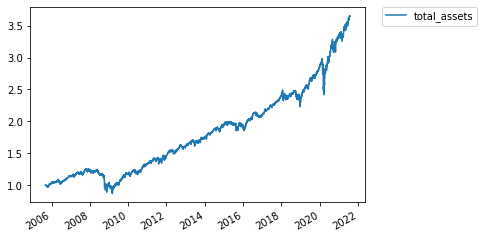

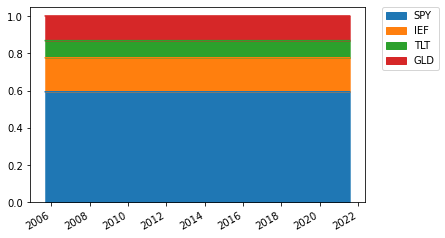

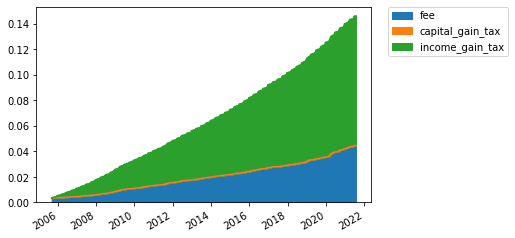

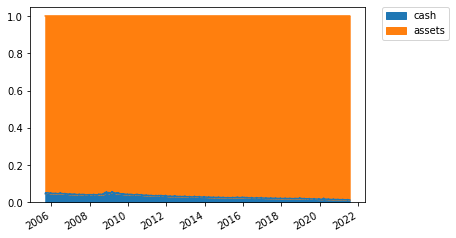

In [15]:
folds = split_k_folds(us_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer(risk_target=[0.85, 0.05, 0.05, 0.05])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
